# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app).copy()
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [6]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [49]:
cut_rule = pd.IntervalIndex.from_tuples([(0,1), (1, 3), (3,6),(6,np.inf)], closed='left')
cut_rule

IntervalIndex([[0.0, 1.0), [1.0, 3.0), [3.0, 6.0), [6.0, inf)],
              closed='left',
              dtype='interval[float64]')

In [50]:
#1
"""
Your code here
"""
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, right=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

[0.0, 1.0)    215371
[1.0, 3.0)     87868
[3.0, 6.0)      4230
[6.0, inf)        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [51]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
[0.0, 1.0)          0         166747.010980
                    1         160804.210548
[1.0, 3.0)          0         174590.584401
                    1         176115.362720
[3.0, 6.0)          0         175053.742913
                    1         160677.385714
[6.0, inf)          0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

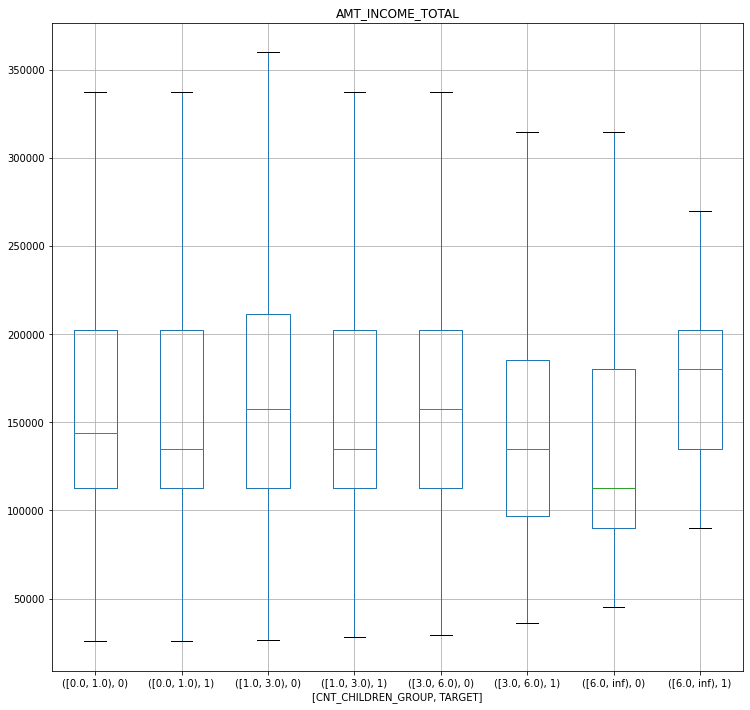

In [52]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = grp

# by: A list of strings (i.e. ['X', 'Y']) can be passed to boxplot 
# in order to group the data by combination of the variables in the x-axis:
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12)) 
plt.suptitle('')
plt.show()

In [113]:
print(grouped_df.mean())
print(grouped_df.std())

CNT_CHILDREN_GROUP  TARGET
[0.0, 1.0)          0         166747.010980
                    1         160804.210548
[1.0, 3.0)          0         174590.584401
                    1         176115.362720
[3.0, 6.0)          0         175053.742913
                    1         160677.385714
[6.0, inf)          0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64
CNT_CHILDREN_GROUP  TARGET
[0.0, 1.0)          0         1.061799e+05
                    1         8.483011e+04
[1.0, 3.0)          0         1.201981e+05
                    1         1.327159e+06
[3.0, 6.0)          0         1.128427e+05
                    1         1.130315e+05
[6.0, inf)          0         7.112483e+04
                    1         7.377118e+04
Name: AMT_INCOME_TOTAL, dtype: float64


In [108]:
app_train[['AMT_INCOME_TOTAL','CNT_CHILDREN_GROUP','TARGET']]

,AMT_INCOME_TOTAL,CNT_CHILDREN_GROUP,TARGET
0,202500.0,"[0.0, 1.0)",1
1,270000.0,"[0.0, 1.0)",0
2,67500.0,"[0.0, 1.0)",0
3,135000.0,"[0.0, 1.0)",0
4,121500.0,"[0.0, 1.0)",0
...,...,...,...
307506,157500.0,"[0.0, 1.0)",0
307507,72000.0,"[0.0, 1.0)",0
307508,153000.0,"[0.0, 1.0)",0
307509,171000.0,"[0.0, 1.0)",1


In [89]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std()) #['AMT_INCOME_TOTAL']

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']]

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
...,...,...
307506,157500.0,-0.087088
307507,72000.0,-0.892325
307508,153000.0,-0.129469
307509,171000.0,0.120191
